# Stack Overflow Developer Survey 2017

Following the CRISP-DM process, I analyze the Stack Overflow Developer Survey from 2017.

## Business Understanding
The first step in the process is to determine the business understanding. In other words, what is the problem or question at hand. I'm most curious about developers with unconventional backgrounds and training, since I myself am coming to the field from a background in humanities and social sciences. So with that, the questions I hope to answer with this data are:

1. What are the differences in salary and satisfaction between developers with interdisciplinary academic backgrounds?
2. What are the differences in salary and satisfaction between developers at different education levels?  
3. What are the differences in salary and satisfaction between developers that say they don't understand computers well?

## Data Understanding
Next, I will need to explore the dataset from the survey and gather the data I need to answer these questions. Therefore, I will need data on developer's undergraduate majors, job and career satisfaction, formal education, importance of education, education types, self-taught methods, and salary. 



In [1]:
import numpy as np
import pandas as pd
import seaborn as sb
from collections import defaultdict
import matplotlib.pyplot as plt
%matplotlib inline

df = pd.read_csv('C:/Users/MicaKnox/Desktop/Udacity/DS_Process/survey-results-public.csv')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51392 entries, 0 to 51391
Columns: 154 entries, Respondent to ExpectedSalary
dtypes: float64(6), int64(1), object(147)
memory usage: 60.4+ MB


In [2]:
df.head(20)

,Respondent,Professional,ProgramHobby,Country,University,EmploymentStatus,FormalEducation,MajorUndergrad,HomeRemote,CompanySize,...,StackOverflowMakeMoney,Gender,HighestEducationParents,Race,SurveyLong,QuestionsInteresting,QuestionsConfusing,InterestedAnswers,Salary,ExpectedSalary
0,1,Student,"Yes, both",United States,No,"Not employed, and not looking for work",Secondary school,NaN,NaN,NaN,...,Strongly disagree,Male,High school,White or of European descent,Strongly disagree,Strongly agree,Disagree,Strongly agree,NaN,NaN
1,2,Student,"Yes, both",United Kingdom,"Yes, full-time",Employed part-time,Some college/university study without earning ...,Computer science or software engineering,"More than half, but not all, the time",20 to 99 employees,...,Strongly disagree,Male,A master's degree,White or of European descent,Somewhat agree,Somewhat agree,Disagree,Strongly agree,NaN,37500.0
2,3,Professional developer,"Yes, both",United Kingdom,No,Employed full-time,Bachelor's degree,Computer science or software engineering,"Less than half the time, but at least one day ...","10,000 or more employees",...,Disagree,Male,A professional degree,White or of European descent,Somewhat agree,Agree,Disagree,Agree,113750.0,NaN
3,4,Professional non-developer who sometimes write...,"Yes, both",United States,No,Employed full-time,Doctoral degree,A non-computer-focused engineering discipline,"Less than half the time, but at least one day ...","10,000 or more employees",...,Disagree,Male,A doctoral degree,White or of European descent,Agree,Agree,Somewhat agree,Strongly agree,NaN,NaN
4,5,Professional developer,"Yes, I program as a hobby",Switzerland,No,Employed full-time,Master's degree,Computer science or software engineering,Never,10 to 19 employees,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,6,Student,"Yes, both",New Zealand,"Yes, full-time","Not employed, and not looking for work",Secondary school,NaN,NaN,NaN,...,Disagree,NaN,A bachelor's degree,White or of European descent,Disagree,Agree,Disagree,Agree,NaN,NaN
6,7,Professional non-developer who sometimes write...,"Yes, both",United States,No,Employed full-time,Master's degree,A non-computer-focused engineering discipline,"Less than half the time, but at least one day ...",20 to 99 employees,...,Disagree,Male,A doctoral degree,White or of European descent,Disagree,Agree,Disagree,Agree,NaN,NaN
7,8,Professional developer,"Yes, both",Poland,No,Employed full-time,Master's degree,Computer science or software engineering,All or almost all the time (I'm full-time remote),Fewer than 10 employees,...,Somewhat agree,Male,A master's degree,White or of European descent,Agree,Somewhat agree,Disagree,Agree,NaN,NaN
8,9,Professional developer,"Yes, I program as a hobby",Colombia,"Yes, part-time",Employed full-time,Bachelor's degree,Computer science or software engineering,"Less than half the time, but at least one day ...","5,000 to 9,999 employees",...,Strongly disagree,Male,A bachelor's degree,Hispanic or Latino/Latina,Somewhat agree,Strongly agree,Disagree,Strongly agree,NaN,NaN
9,10,Professional developer,"Yes, I program as a hobby",France,"Yes, full-time","Independent contractor, freelancer, or self-em...",Master's degree,Computer science or software engineering,It's complicated,NaN,...,Disagree,Male,A doctoral degree,White or of European descent,Somewhat agree,Agree,Disagree,Agree,NaN,NaN


In [3]:
df.describe()

,Respondent,CareerSatisfaction,JobSatisfaction,HoursPerWeek,StackOverflowSatisfaction,Salary,ExpectedSalary
count,51392.000000,42695.000000,40376.000000,20600.000000,36592.000000,12891.000000,2566.000000
mean,25696.500000,7.300574,6.957078,3.952282,8.429875,56298.480641,33142.220468
std,14835.736854,1.955444,2.167652,7.564722,1.390635,39880.905277,30162.988829
min,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,12848.750000,6.000000,6.000000,1.000000,8.000000,26440.371839,4490.492484
50%,25696.500000,8.000000,7.000000,1.000000,9.000000,50000.000000,29364.263691
75%,38544.250000,9.000000,8.000000,4.000000,10.000000,80000.000000,50403.225806
max,51392.000000,10.000000,10.000000,40.000000,10.000000,197000.000000,187500.000000


I can see from the output above that there is a lot of data to work with: over 150 different variables I could examine from over 51,000 respondents. However, when I used describe to examine the data, I noticed that not all of the variables have the same number of observations. I need to look at the variables I am interested in more specifically to see how to handle missing values. I will calculate the percentage of missing values for each one.

In [6]:
#Create a subset of the data that includes only the variables of interest
vars = df[['MajorUndergrad','FormalEducation', 'UnderstandComputers','Salary', 'CareerSatisfaction', 'JobSatisfaction']]
vars.head(20)

,MajorUndergrad,FormalEducation,UnderstandComputers,Salary,CareerSatisfaction,JobSatisfaction
0,NaN,Secondary school,Disagree,NaN,NaN,NaN
1,Computer science or software engineering,Some college/university study without earning ...,NaN,NaN,NaN,NaN
2,Computer science or software engineering,Bachelor's degree,Disagree,113750.0,8.0,9.0
3,A non-computer-focused engineering discipline,Doctoral degree,Strongly disagree,NaN,6.0,3.0
4,Computer science or software engineering,Master's degree,NaN,NaN,6.0,8.0
5,NaN,Secondary school,NaN,NaN,NaN,NaN
6,A non-computer-focused engineering discipline,Master's degree,NaN,NaN,7.0,6.0
7,Computer science or software engineering,Master's degree,NaN,NaN,7.0,7.0
8,Computer science or software engineering,Bachelor's degree,Strongly disagree,NaN,6.0,6.0
9,Computer science or software engineering,Master's degree,NaN,NaN,6.0,8.0


### Data Pre-Preparation 

In [7]:
#Examine the shape, null count, and data types of the subset of data 
vars.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51392 entries, 0 to 51391
Data columns (total 6 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   MajorUndergrad       42841 non-null  object 
 1   FormalEducation      51392 non-null  object 
 2   UnderstandComputers  31047 non-null  object 
 3   Salary               12891 non-null  float64
 4   CareerSatisfaction   42695 non-null  float64
 5   JobSatisfaction      40376 non-null  float64
dtypes: float64(3), object(3)
memory usage: 2.4+ MB


In [8]:
#What percentage of the dataset for each variable is null?
vars.isnull().sum()/df.shape[0]


MajorUndergrad         0.166388
FormalEducation        0.000000
UnderstandComputers    0.395879
Salary                 0.749163
CareerSatisfaction     0.169229
JobSatisfaction        0.214352
dtype: float64

Good news! None of the variables of interest are missing all values. Also, I'm not planning to predict any outcomes with this data. So I do not need to remove any of the missing data at this time. Even though some of these variables contain a lot of missing values, they still provide data relvant to the questions at hand. Plus, with such a large dataset there are still a large number of observations to work with.

## Data Preparation
Next, I will take a look at each variable to see if any preparation is needed such as encoding, transforming, or constructing.

In [9]:
var_count1 = vars['MajorUndergrad'].value_counts()
print (var_count1)

Computer science or software engineering                        21409
Computer engineering or electrical/electronics engineering       4364
Computer programming or Web development                          3883
Information technology, networking, or system administration     2140
A natural science                                                1865
A non-computer-focused engineering discipline                    1789
Mathematics or statistics                                        1648
Something else                                                   1060
A humanities discipline                                           901
A business discipline                                             900
Management information systems                                    654
Fine arts or performing arts                                      646
A social science                                                  633
I never declared a major                                          592
Psychology          

Each type of major is listed individually, so there is no need to parse the string values. Since this is a categorical variable, it should be a string. So this variable looks good to me for the questions I am trying to answer. I can now create some exploratory figures to better understand the distribution of responses. 

In [25]:
#Find the relative frequency of each major
var_count1/var_count1.sum()

Computer science or software engineering                        0.499732
Computer engineering or electrical/electronics engineering      0.101865
Computer programming or Web development                         0.090637
Information technology, networking, or system administration    0.049952
A natural science                                               0.043533
A non-computer-focused engineering discipline                   0.041759
Mathematics or statistics                                       0.038468
Something else                                                  0.024743
A humanities discipline                                         0.021031
A business discipline                                           0.021008
Management information systems                                  0.015266
Fine arts or performing arts                                    0.015079
A social science                                                0.014776
I never declared a major                           

''

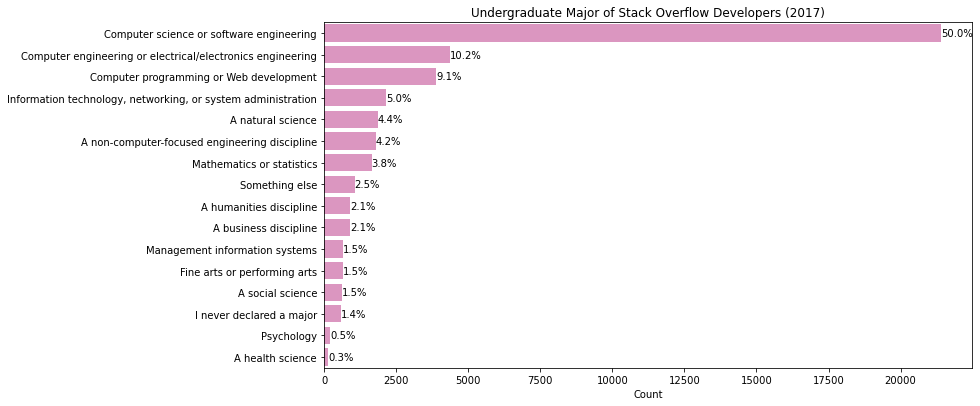

In [11]:
#Plot the relative frequency
base_color=sb.color_palette('Set2')[3]
order= vars['MajorUndergrad'].value_counts().index
fig = plt.figure()
ax = fig.add_axes([.125, .125, 1.5, 1.2])
sb.countplot(data=vars, y='MajorUndergrad', color=base_color, order=order)
plt.ylabel('')
plt.xlabel('Count')
plt.title('Undergraduate Major of Stack Overflow Developers (2017)')
for i in range (var_count1.shape[0]):
    count = var_count1[i]
    pct_str = '{:0.1f}%'.format(100*count/vars['MajorUndergrad'].value_counts().sum())
    plt.text(count+1, i, pct_str, va='center')
;

I put the results of the plot in order of frequency so I can see from this plot that about 85% of developers have some background in computers, engineering, info tech, or science. This doesn't answer my questions yet, but after I look at the distribution for majors, degrees, and computer savvy, I'll come back to do an analysis of salary and satisfaction.

In [12]:
var_count2 = vars['FormalEducation'].value_counts()
print (var_count2)

Bachelor's degree                                                    21609
Master's degree                                                      11141
Some college/university study without earning a bachelor's degree     8129
Secondary school                                                      5908
Doctoral degree                                                       1308
I prefer not to answer                                                1109
Primary/elementary school                                             1047
Professional degree                                                    715
I never completed any formal education                                 426
Name: FormalEducation, dtype: int64


Each type of formal education is listed individually, so there is no need to parse the string values. Since this is a categorical variable, it should be a string. So this variable also looks good to me. Also of note, this is the only variable I selected that has no missing values.

In [24]:
#Find the relative frequency of each type of education
var_count2/var_count2.sum()

Bachelor's degree                                                    0.420474
Master's degree                                                      0.216785
Some college/university study without earning a bachelor's degree    0.158176
Secondary school                                                     0.114960
Doctoral degree                                                      0.025451
I prefer not to answer                                               0.021579
Primary/elementary school                                            0.020373
Professional degree                                                  0.013913
I never completed any formal education                               0.008289
Name: FormalEducation, dtype: float64

''

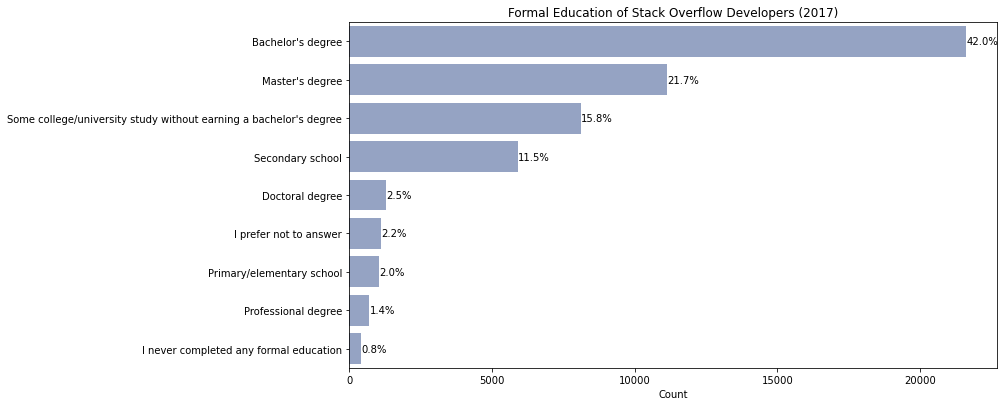

In [14]:
#Plot the relative frequency
base_color=sb.color_palette('Set2')[2]
order= vars['FormalEducation'].value_counts().index
fig = plt.figure()
ax = fig.add_axes([.125, .125, 1.5, 1.2])
sb.countplot(data=vars, y='FormalEducation', color=base_color, order=order)
plt.ylabel('')
plt.xlabel('Count')
plt.title('Formal Education of Stack Overflow Developers (2017)')
for i in range (var_count2.shape[0]):
    count = var_count2[i]
    pct_str = '{:0.1f}%'.format(100*count/vars['FormalEducation'].value_counts().sum())
    plt.text(count+1, i, pct_str, va='center')
;

Again, I've put these in order of frequency to see what the most common education levels of develoeprs are. Most have a bachelor's degree, but I can also see that about 35% of developers have less than a bachelor's degree, which seems pretty high for such a high skilled profession! 

In [21]:
#For this variable, I think it makes the most sense that the responses be lsited in order from Strongly Disagree to Strongly Agree
#So I don't want the value counts to be sorted in descending order
var_count3 = df['UnderstandComputers'].value_counts(sort=False)
print (var_count3)

Disagree             8036
Strongly disagree    3518
Strongly agree       4306
Somewhat agree       8071
Agree                7116
Name: UnderstandComputers, dtype: int64


In [22]:
#Not sorting the value counts still doesn't give me the order I want, so I need to reindex the responses 
var_count3a = var_count3.reindex(['Strongly disagree','Disagree','Somewhat agree','Agree','Strongly agree'])

In [23]:
#Now that they are in the right order, I want to find the relative frequency of each major
var_count3a/var_count3a.sum()

Strongly disagree    0.113312
Disagree             0.258833
Somewhat agree       0.259961
Agree                0.229201
Strongly agree       0.138693
Name: UnderstandComputers, dtype: float64

''

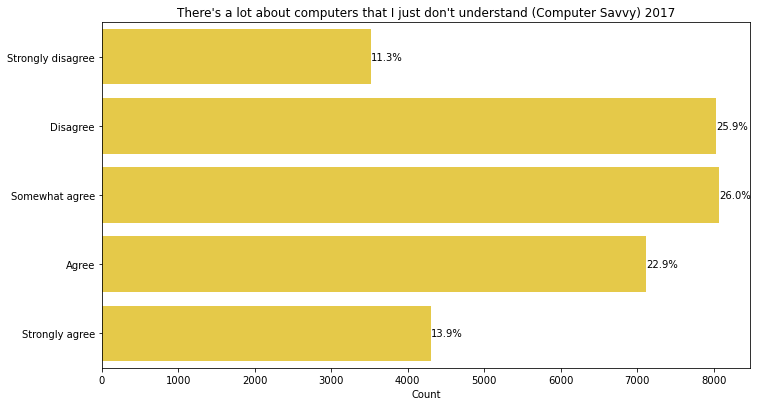

In [45]:
#Plot the relative frequency
base_color=sb.color_palette('Set2')[5]
order = ['Strongly disagree', 'Disagree', 'Somewhat agree', 'Agree', 'Strongly agree']
fig = plt.figure()
ax = fig.add_axes([.125, .125, 1.5, 1.2])
sb.countplot(data=vars, y='UnderstandComputers', color=base_color, order=order)
plt.ylabel('')
plt.xlabel('Count')
plt.title('There\'s a lot about computers that I just don\'t understand (Computer Savvy) 2017')
for i in range (var_count8a.shape[0]):
    count = var_count8a[i]
    pct_str = '{:0.1f}%'.format(100*count/vars['UnderstandComputers'].value_counts().sum())
    plt.text(count+1, i, pct_str, va='center')
;

The double negative in this survey question makes it a little harder to interpret. But basically, 11% of respondents strongly disagree that they don't understand computers--they think they understand them well! About 50% said they disagree or somewhat agree, so they understand computers well enough. The bottom 35% agree that they don't understand computers well. I definitely would have expected the results for developers to be skewed more towards disagree for this question.

In [26]:
#To wrap up preparation, I want to take a quick look at the numeric variables to confirm they appear as I expect. 
var_count4 = vars['CareerSatisfaction'].value_counts()
print (var_count4)

8.0     11037
7.0      9384
9.0      5579
10.0     5408
6.0      4721
5.0      3070
4.0      1352
3.0      1046
2.0       495
0.0       392
1.0       211
Name: CareerSatisfaction, dtype: int64


In [27]:
var_count5 = vars['JobSatisfaction'].value_counts()
print (var_count5)

8.0     8983
7.0     7969
9.0     5573
6.0     4726
10.0    4148
5.0     3749
4.0     1865
3.0     1635
2.0      888
0.0      467
1.0      373
Name: JobSatisfaction, dtype: int64


In [32]:
#I'm not expecting to get a count for salaries, since it is a continuous variable rather than discrete.
#So, I'll describe this one instead. 
vars['Salary'].describe()

count     12891.000000
mean      56298.480641
std       39880.905277
min           0.000000
25%       26440.371839
50%       50000.000000
75%       80000.000000
max      197000.000000
Name: Salary, dtype: float64

The overall average for all salaries in the dataset is \\$56k. The maximum is \\ $197,000 and the minimum is \\ $0. The minimum makes sense in that not all developers are necessarily currently employed as such. While I may want to drop the rows with $0 for the salary analysis, I don't want to eliminate data points for the satisfaction analysis, so I'll do the salary last and drop the zeros at that point. 

## Visualization
Next, I want to do a more in-depth analysis to answer my business questions. That will require me to create some bivariate plots to visualize and analyze the relationship between these three categorical variables and the numeric variables for satisfaction ratings and salary. My questions don't require ML so I can skip the CRISP-DM steps to model and evaluate. 

This variable looks good! I can start using this discrete numeric variable in bivariate plots to show the relationship with the previous variables and career satisfaction.

##### Satisfaction relative to undergraduate major

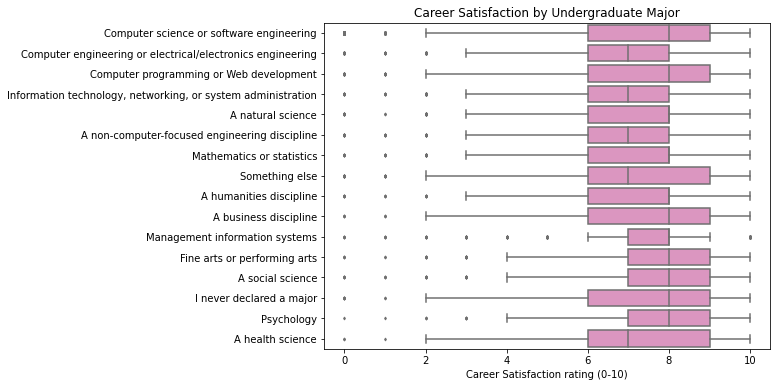

In [32]:
base_color=sb.color_palette('Set2')[3]
order = vars['MajorUndergrad'].value_counts().index
plt.figure(1,(8,6))
sb.boxplot(data=vars, y='MajorUndergrad', x='CareerSatisfaction', color=base_color, fliersize=2, order = order)
plt.ylabel('')
plt.xlabel('Career Satisfaction rating (0-10)')
plt.title('Career Satisfaction by Undergraduate Major');

Career satisfaction has some variation, but is relatively consistent. It seems to show that developers with a social science background rate their satisfaction just as highly as STEM majors and for some non-STEM backgrounds the range of average ratings is even more positively skewed than for STEM majors.

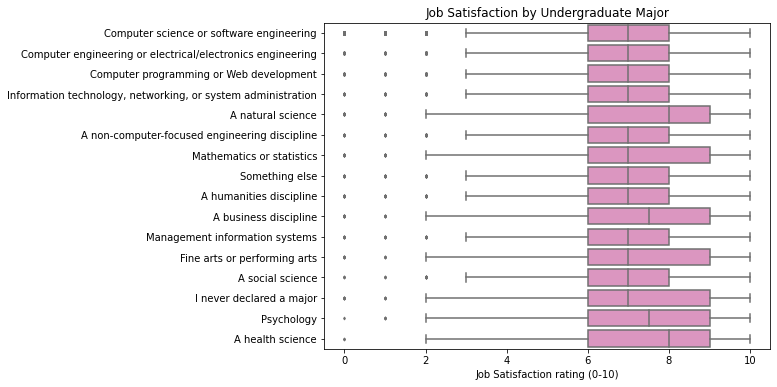

In [28]:
base_color=sb.color_palette('Set2')[3]
order = vars['MajorUndergrad'].value_counts().index
plt.figure(1,(8,6))
sb.boxplot(data=vars, y='MajorUndergrad', x='JobSatisfaction', color=base_color, fliersize=2, order = order)
plt.ylabel('')
plt.xlabel('Job Satisfaction rating (0-10)')
plt.title('Job Satisfaction by Undergraduate Major');

The average ratings for job satisfaction is remarkably consistent across most of the majors and some of the non-STEM majors are again more positively skewed. Good findings for non-STEM majors interested in being a developer.

##### Satisfaction relative to formal education level

For these graphs, I decided it made the most sense to put the responses in order of descending education level, starting with the highest level being a doctoral degree. 

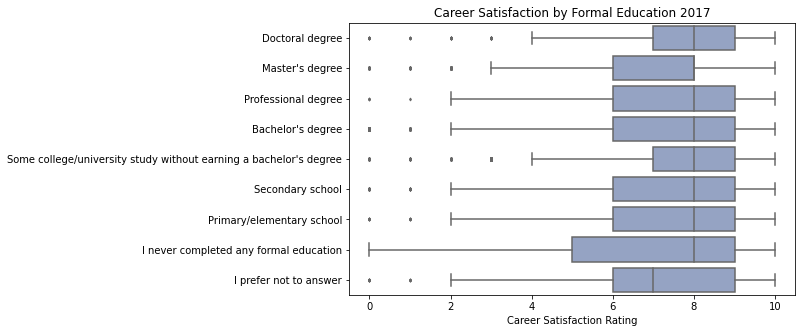

In [38]:
base_color=sb.color_palette('Set2')[2]
order= ['Doctoral degree','Master\'s degree','Professional degree','Bachelor\'s degree','Some college/university study without earning a bachelor\'s degree','Secondary school','Primary/elementary school','I never completed any formal education','I prefer not to answer']
plt.figure(1,(8,5))
sb.boxplot(data=vars, y='FormalEducation', x='CareerSatisfaction', color=base_color, fliersize=2, order = order)
plt.ylabel('')
plt.xlabel('Career Satisfaction Rating')
plt.title('Career Satisfaction by Formal Education 2017');

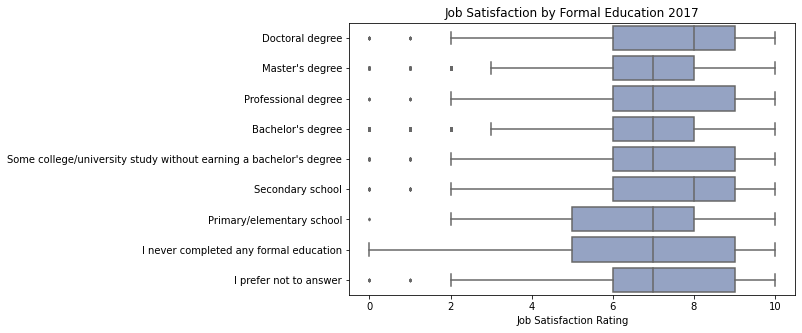

In [39]:
base_color=sb.color_palette('Set2')[2]
order= ['Doctoral degree','Master\'s degree','Professional degree','Bachelor\'s degree','Some college/university study without earning a bachelor\'s degree','Secondary school','Primary/elementary school','I never completed any formal education','I prefer not to answer']
plt.figure(1,(8,5))
sb.boxplot(data=vars, y='FormalEducation', x='JobSatisfaction', color=base_color, fliersize=2, order = order)
plt.ylabel('')
plt.xlabel('Job Satisfaction Rating')
plt.title('Job Satisfaction by Formal Education 2017');

There are some peaks in job satisfaction depending on the degree a developer holds, where the ranges of satisfaction ratings are widest for education levels under a bachelors and for doctoral degrees. However, they are all positively skewed regardless of education level. The same is true of overall career satisfaction in Figure 7 and the ratings are even more consistent. The range of average satisfaction ratings is much narrower for bachelor's and master's holders than other education levels, suggesting perhaps more consistency.The lowest average satisfaction ratings are for those who had only primary school education or never completed formal education. This is interesting in contrast to the salaries reported by this group. 

##### Satisfaction relative to computer savvy

Again, I kept these in the order of Strongly Disagree to Strongly Agree

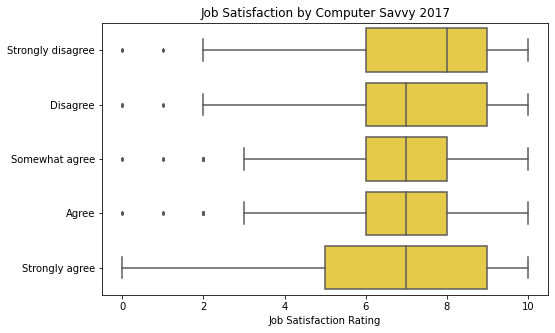

In [46]:
base_color=sb.color_palette('Set2')[5]
order = ['Strongly disagree', 'Disagree', 'Somewhat agree', 'Agree', 'Strongly agree']
plt.figure(1,(8,5))
sb.boxplot(data=vars, y='UnderstandComputers', x='JobSatisfaction', color=base_color, fliersize=2, order = order)
plt.ylabel('')
plt.xlabel('Job Satisfaction Rating')
plt.title('Job Satisfaction by Computer Savvy 2017');

It seems those who understand computers well reported slightly higher job satisfaction than their peers. Meanwhile, everyone else reported the same average job satisfaction. That being said, those who strongly agree they don't understand computers well have a wider range of satisfaction ratings. 

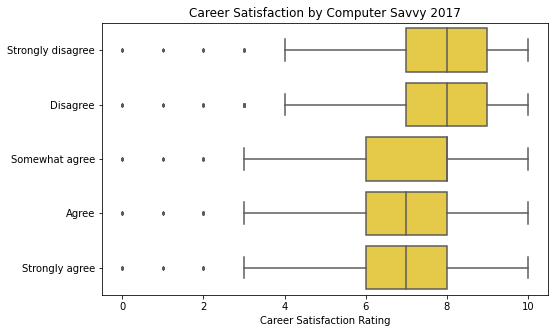

In [33]:
base_color=sb.color_palette('Set2')[5]
order = ['Strongly disagree', 'Disagree', 'Somewhat agree', 'Agree', 'Strongly agree']
plt.figure(1,(8,5))
sb.boxplot(data=vars, y='UnderstandComputers', x='CareerSatisfaction', color=base_color, fliersize=2, order = order)
plt.ylabel('')
plt.xlabel('Career Satisfaction Rating')
plt.title('Career Satisfaction by Computer Savvy 2017');

When it comes to career satisfaction, everyone seems quite satisfied overall. The average for all levels of computer savvy is a satisfaction rating of 7 or 8. Those who understand computers better more often gave a satisfaction rating of 9, though. 

#### Salary Analysis

Now I'm going to drop the zero values from the Salary column because I think its unlikely that employed develoeprs are not being compensated for their work and skill. 

In [35]:
vars2 = vars[(vars['Salary']>0)]

In [36]:
vars2.head()

,MajorUndergrad,FormalEducation,UnderstandComputers,Salary,CareerSatisfaction,JobSatisfaction
2,Computer science or software engineering,Bachelor's degree,Disagree,113750.0,8.0,9.0
14,Computer engineering or electrical/electronics...,Professional degree,Disagree,100000.0,8.0,8.0
17,Computer science or software engineering,Bachelor's degree,Strongly agree,130000.0,9.0,8.0
18,Computer science or software engineering,Bachelor's degree,Disagree,82500.0,5.0,3.0
22,Computer engineering or electrical/electronics...,Bachelor's degree,NaN,100764.0,8.0,9.0


In [37]:
vars2['Salary'].describe()

count     12885.000000
mean      56324.696464
std       39871.676322
min           0.014682
25%       26515.151515
50%       50000.000000
75%       80000.000000
max      197000.000000
Name: Salary, dtype: float64

Well, dropping all the zero values from the dataset didn't get me very far. The minimum salary is now 1.4 cents, which doens't tell me much either. I'll try adding the employment column to see if I can get results for full-time employed developers only. 

In [41]:
vars3 = df[['MajorUndergrad','FormalEducation', 'UnderstandComputers','EmploymentStatus','Salary', 'CareerSatisfaction', 'JobSatisfaction']]
vars3.head()

,MajorUndergrad,FormalEducation,UnderstandComputers,EmploymentStatus,Salary,CareerSatisfaction,JobSatisfaction
0,NaN,Secondary school,Disagree,"Not employed, and not looking for work",NaN,NaN,NaN
1,Computer science or software engineering,Some college/university study without earning ...,NaN,Employed part-time,NaN,NaN,NaN
2,Computer science or software engineering,Bachelor's degree,Disagree,Employed full-time,113750.0,8.0,9.0
3,A non-computer-focused engineering discipline,Doctoral degree,Strongly disagree,Employed full-time,NaN,6.0,3.0
4,Computer science or software engineering,Master's degree,NaN,Employed full-time,NaN,6.0,8.0


In [43]:
vars3 = vars3[(vars3['Salary']>0) & (vars3['EmploymentStatus']== "Employed full-time")]
vars3.head()

,MajorUndergrad,FormalEducation,UnderstandComputers,EmploymentStatus,Salary,CareerSatisfaction,JobSatisfaction
2,Computer science or software engineering,Bachelor's degree,Disagree,Employed full-time,113750.0,8.0,9.0
14,Computer engineering or electrical/electronics...,Professional degree,Disagree,Employed full-time,100000.0,8.0,8.0
17,Computer science or software engineering,Bachelor's degree,Strongly agree,Employed full-time,130000.0,9.0,8.0
18,Computer science or software engineering,Bachelor's degree,Disagree,Employed full-time,82500.0,5.0,3.0
22,Computer engineering or electrical/electronics...,Bachelor's degree,NaN,Employed full-time,100764.0,8.0,9.0


In [45]:
vars3['Salary'].describe()

count     12438.000000
mean      57381.580844
std       39871.944002
min           0.014682
25%       27956.989247
50%       51297.025641
75%       80608.870968
max      197000.000000
Name: Salary, dtype: float64

Even limiting the sample to those who are employed full-time still results in a minimum salary of 1.4 cents. I don't have an idea of what the reason is behind such a low salary either. So rather than manipulate the dataset, I'm going to leave it as is and use the original vars dataframe. 

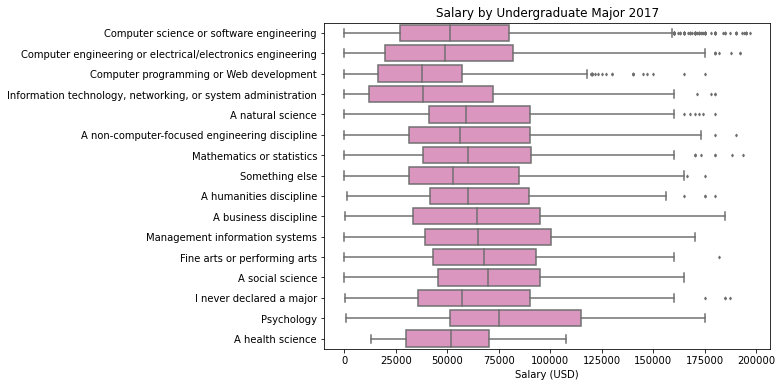

In [39]:
base_color=sb.color_palette('Set2')[3]
order = vars['MajorUndergrad'].value_counts().index
plt.figure(1,(8,6))
sb.boxplot(data=vars, y='MajorUndergrad', x='Salary', color=base_color, fliersize=2, order = order)
plt.ylabel('')
plt.xlabel('Salary (USD)')
plt.title('Salary by Undergraduate Major 2017');

While there is some variation, the average salary reported for each major falls within the \\$50,000 - $75,000 range. Interestingly, the highest salary range was reported for psychology, business, and computer engineering majors. Meanwhile, computer programming and IT reported the lowest average salaries.

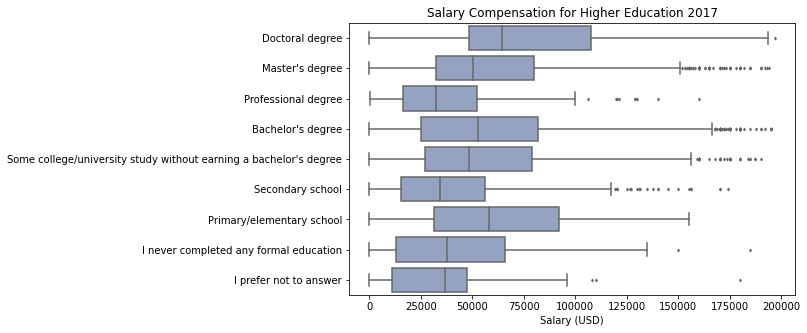

In [37]:
base_color=sb.color_palette('Set2')[2]
order= ['Doctoral degree','Master\'s degree','Professional degree','Bachelor\'s degree','Some college/university study without earning a bachelor\'s degree','Secondary school','Primary/elementary school','I never completed any formal education','I prefer not to answer']
plt.figure(1,(8,5))
sb.boxplot(data=vars, y='FormalEducation', x='Salary', color=base_color, fliersize=2, order = order)
plt.ylabel('')
plt.xlabel('Salary (USD)')
plt.title('Salary Compensation for Higher Education 2017');

There are some interesting results. As I would expect, doctoral degrees have the highest salary range. However, master's and bachelor's degree holders reported approximately the same average salary ranges. Bachelor's degree holders had a slightly higher end range than master's. Surprisingly, though, developers with only elementary school education reported an average salary range higher than both master's and bachelor's degree holders! The higher end of the salary range for elementary school education is approximatley equal to that of a master's holder, which is lower than a bachelor's.

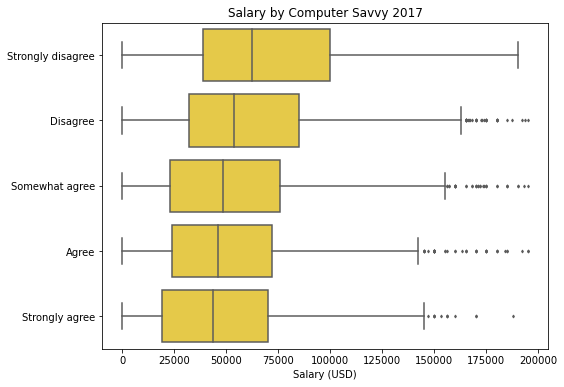

In [47]:
base_color=sb.color_palette('Set2')[5]
order = ['Strongly disagree', 'Disagree', 'Somewhat agree', 'Agree', 'Strongly agree']
plt.figure(1,(8,6))
sb.boxplot(data=vars, y='UnderstandComputers', x='Salary', color=base_color, fliersize=2, order = order)
plt.ylabel('')
plt.xlabel('Salary (USD)')
plt.title('Salary by Computer Savvy 2017');

It seems understanding computers well does make some difference in terms of salary. Those who strongly agree and agree that they don't understand computers well reported an average salary of under \\$50,000. Meanwhile, those who understand computers well reported over \\$50,000 and the top of their salary range was around \\$185,000 compared to \\$145,000 for those who don't understand computers as well. 

##### So, to answer question 1: What are the differences in salary and satisfaction between developers with interdisciplinary academic backgrounds?

It seems that while there is some variation, it falls within a limited range for both satisfaction and salary. In terms of satisfaction, some developers that had non-STEM majors in undergrad even rated their job and career satisfaction slightly higher on average. Meanwhile, the majority of average salaries reported fell within a $25,000 range with unexpected highs in non-STEM fields and unexpected lows in computer programming and IT.

##### Question 2: What are the differences in salary and satisfaction between developers at different education levels?

It seems its entirely possible to have a satisfying, well-paid career as a developer without an expensive degree! It certainly isn't as necessary in this field to pursue the highest education as it is in other professions. In fact, many developers with less education are just as well paid as more highly educated peers. This suggest that it is more about applied skills than the degree one earns. 

##### Question 3: What are the differences in salary and satisfaction between developers that say they don't understand computers well?

While there are developers who agreed and strongly agreed that they did not understand computers well, they did tend to have slightly lower satisfaction ratings. They also had lower salary ranges than those who felt they understood computers well. So while it is not an absolute requirement to understand computers well, those who do are likely to be a little happier and successful as a developer. 